**Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from scipy.stats import spearmanr

In [4]:
#reading dataset
df = pd.read_csv('./dataset/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Let us check if there are any missing entries in the dataset

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Remove the non essential features

In [7]:
# Clearly the feature 'customerID' is of no use to us and can be dropped
df.drop(columns='customerID',inplace=True)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


For each quantitative attribute, calculate its average, standard deviation, minimum, and maximum values.

In [9]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % df[col].mean())
        print('\t Standard deviation = %.2f' % df[col].std())
        print('\t Minimum = %.2f' % df[col].min())
        print('\t Maximum = %.2f' % df[col].max())

SeniorCitizen:
	 Mean = 0.16
	 Standard deviation = 0.37
	 Minimum = 0.00
	 Maximum = 1.00
tenure:
	 Mean = 32.37
	 Standard deviation = 24.56
	 Minimum = 0.00
	 Maximum = 72.00
MonthlyCharges:
	 Mean = 64.76
	 Standard deviation = 30.09
	 Minimum = 18.25
	 Maximum = 118.75


In [10]:
# the TotalCharges column should have come under quantitative feature
df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors='ignore')

In [11]:
df["TotalCharges"].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [12]:
df["TotalCharges"].replace(' ', np.nan, inplace=True)

In [13]:
df["TotalCharges"].isnull().sum()

11

In [14]:
# let us drop all rows with any missing value
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [16]:
# now let us reprint the standard measures for numeric features 
description = df.describe()
description = description.drop(["25%", "50%", "75%"])  # Remove rows for those percentiles
print(description)


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
max         1.000000    72.000000      118.750000   8684.800000


<AxesSubplot:xlabel='Churn', ylabel='count'>

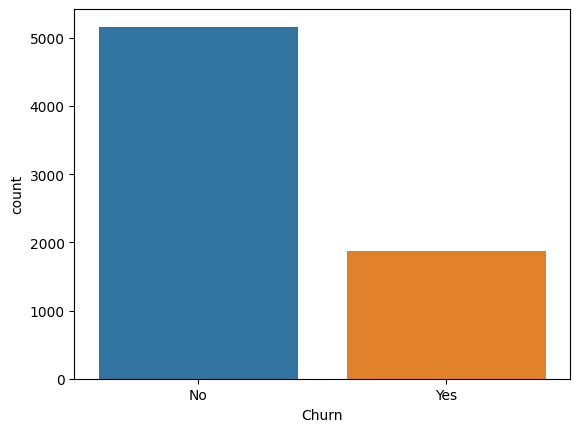

In [17]:
sns.countplot(data=df,x="Churn")

### Let us visulaise data by grouping different features using groupBy method

In [18]:
grouped_gender_churn = df.groupby(['gender', 'Churn'])['Churn'].count()
print(grouped_gender_churn)

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64


In [19]:
grouped_SeniorCitizen_churn = df.groupby(['SeniorCitizen', 'Churn'])['Churn'].count()
print(grouped_SeniorCitizen_churn)

SeniorCitizen  Churn
0              No       4497
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64


Observation
- Customers who are senior citizen appear to have a lower churn rate compared to those who are not. 

In [20]:
grouped_Partner_churn = df.groupby(['Partner', 'Churn'])['Churn'].count()
print(grouped_Partner_churn)

Partner  Churn
No       No       2439
         Yes      1200
Yes      No       2724
         Yes       669
Name: Churn, dtype: int64


In [21]:
grouped_Dependents_churn = df.groupby(['Dependents', 'Churn'])['Churn'].count()
print(grouped_Dependents_churn)

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1773
            Yes       326
Name: Churn, dtype: int64


Observation
- Customers with dependents appear to have a lower churn rate compared to those without dependents. 
- This is indicated by the smaller count of customers with dependents who churned.

In [22]:
grouped_Dependents_churn = df.groupby(['PhoneService', 'Churn'])['Churn'].count()
print(grouped_Dependents_churn)

PhoneService  Churn
No            No        510
              Yes       170
Yes           No       4653
              Yes      1699
Name: Churn, dtype: int64


In [23]:
grouped_Dependents_churn = df.groupby(['InternetService', 'Churn'])['Churn'].count()
print(grouped_Dependents_churn)

InternetService  Churn
DSL              No       1957
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1407
                 Yes       113
Name: Churn, dtype: int64


Observation
-  Customers with Fiber optic tend to have a notably higher churn rate compared to customers with DSL or no Internet Service

In [24]:
grouped_paperless_churn = df.groupby(['PaperlessBilling', 'Churn'])['Churn'].count()
print(grouped_paperless_churn)

PaperlessBilling  Churn
No                No       2395
                  Yes       469
Yes               No       2768
                  Yes      1400
Name: Churn, dtype: int64


**Observation**
- Customers with Paperless Billing tend to have a higher churn rate compared to those without Paperless Billing

### Let us play with the crosstab feature of panda ###

In [25]:
pd.crosstab(df['PaymentMethod'],df['Churn'],margins=True)

Churn,No,Yes,All
PaymentMethod,,,
Bank transfer (automatic),1284,258,1542
Credit card (automatic),1289,232,1521
Electronic check,1294,1071,2365
Mailed check,1296,308,1604
All,5163,1869,7032


**Observation**
- Customers who use electronic check as payment method have higher churn rate than others

In [26]:
pd.crosstab(df['Contract'],df['Churn'],margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1306,166,1472
Two year,1637,48,1685
All,5163,1869,7032


**Observation**
- Customers who have month-to-month contract have higher churn rate than others

In [27]:
pd.crosstab(df['TechSupport'],df['Churn'],margins=True)

Churn,No,Yes,All
TechSupport,,,
No,2026,1446,3472
No internet service,1407,113,1520
Yes,1730,310,2040
All,5163,1869,7032


<AxesSubplot:xlabel='Churn', ylabel='count'>

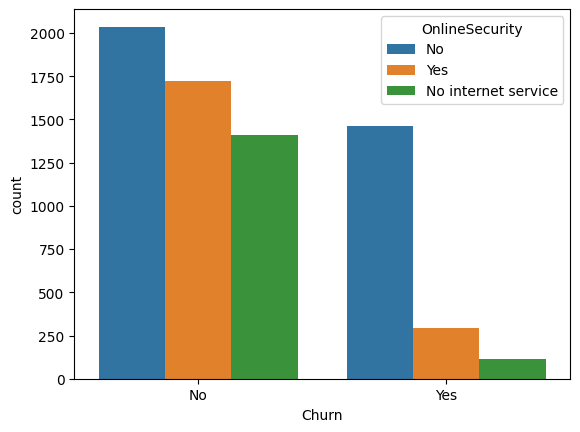

In [28]:
sns.countplot(data=df,x="Churn",hue="OnlineSecurity")

<AxesSubplot:xlabel='Churn', ylabel='count'>

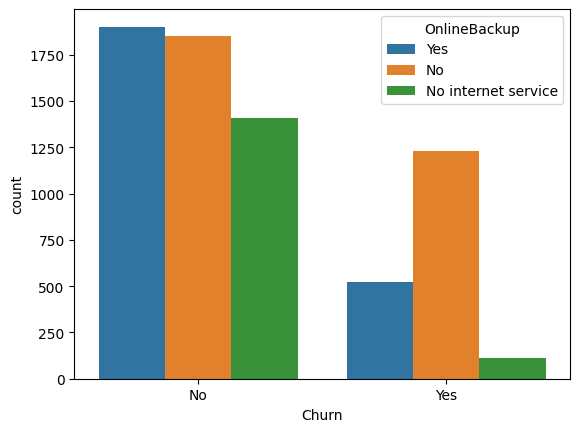

In [29]:
sns.countplot(data=df,x="Churn",hue="OnlineBackup")

**Observation**
- Customers with no online security or online backup have a higher churn rate

### Let us create count plots to visualize the distribution of categorical variables.

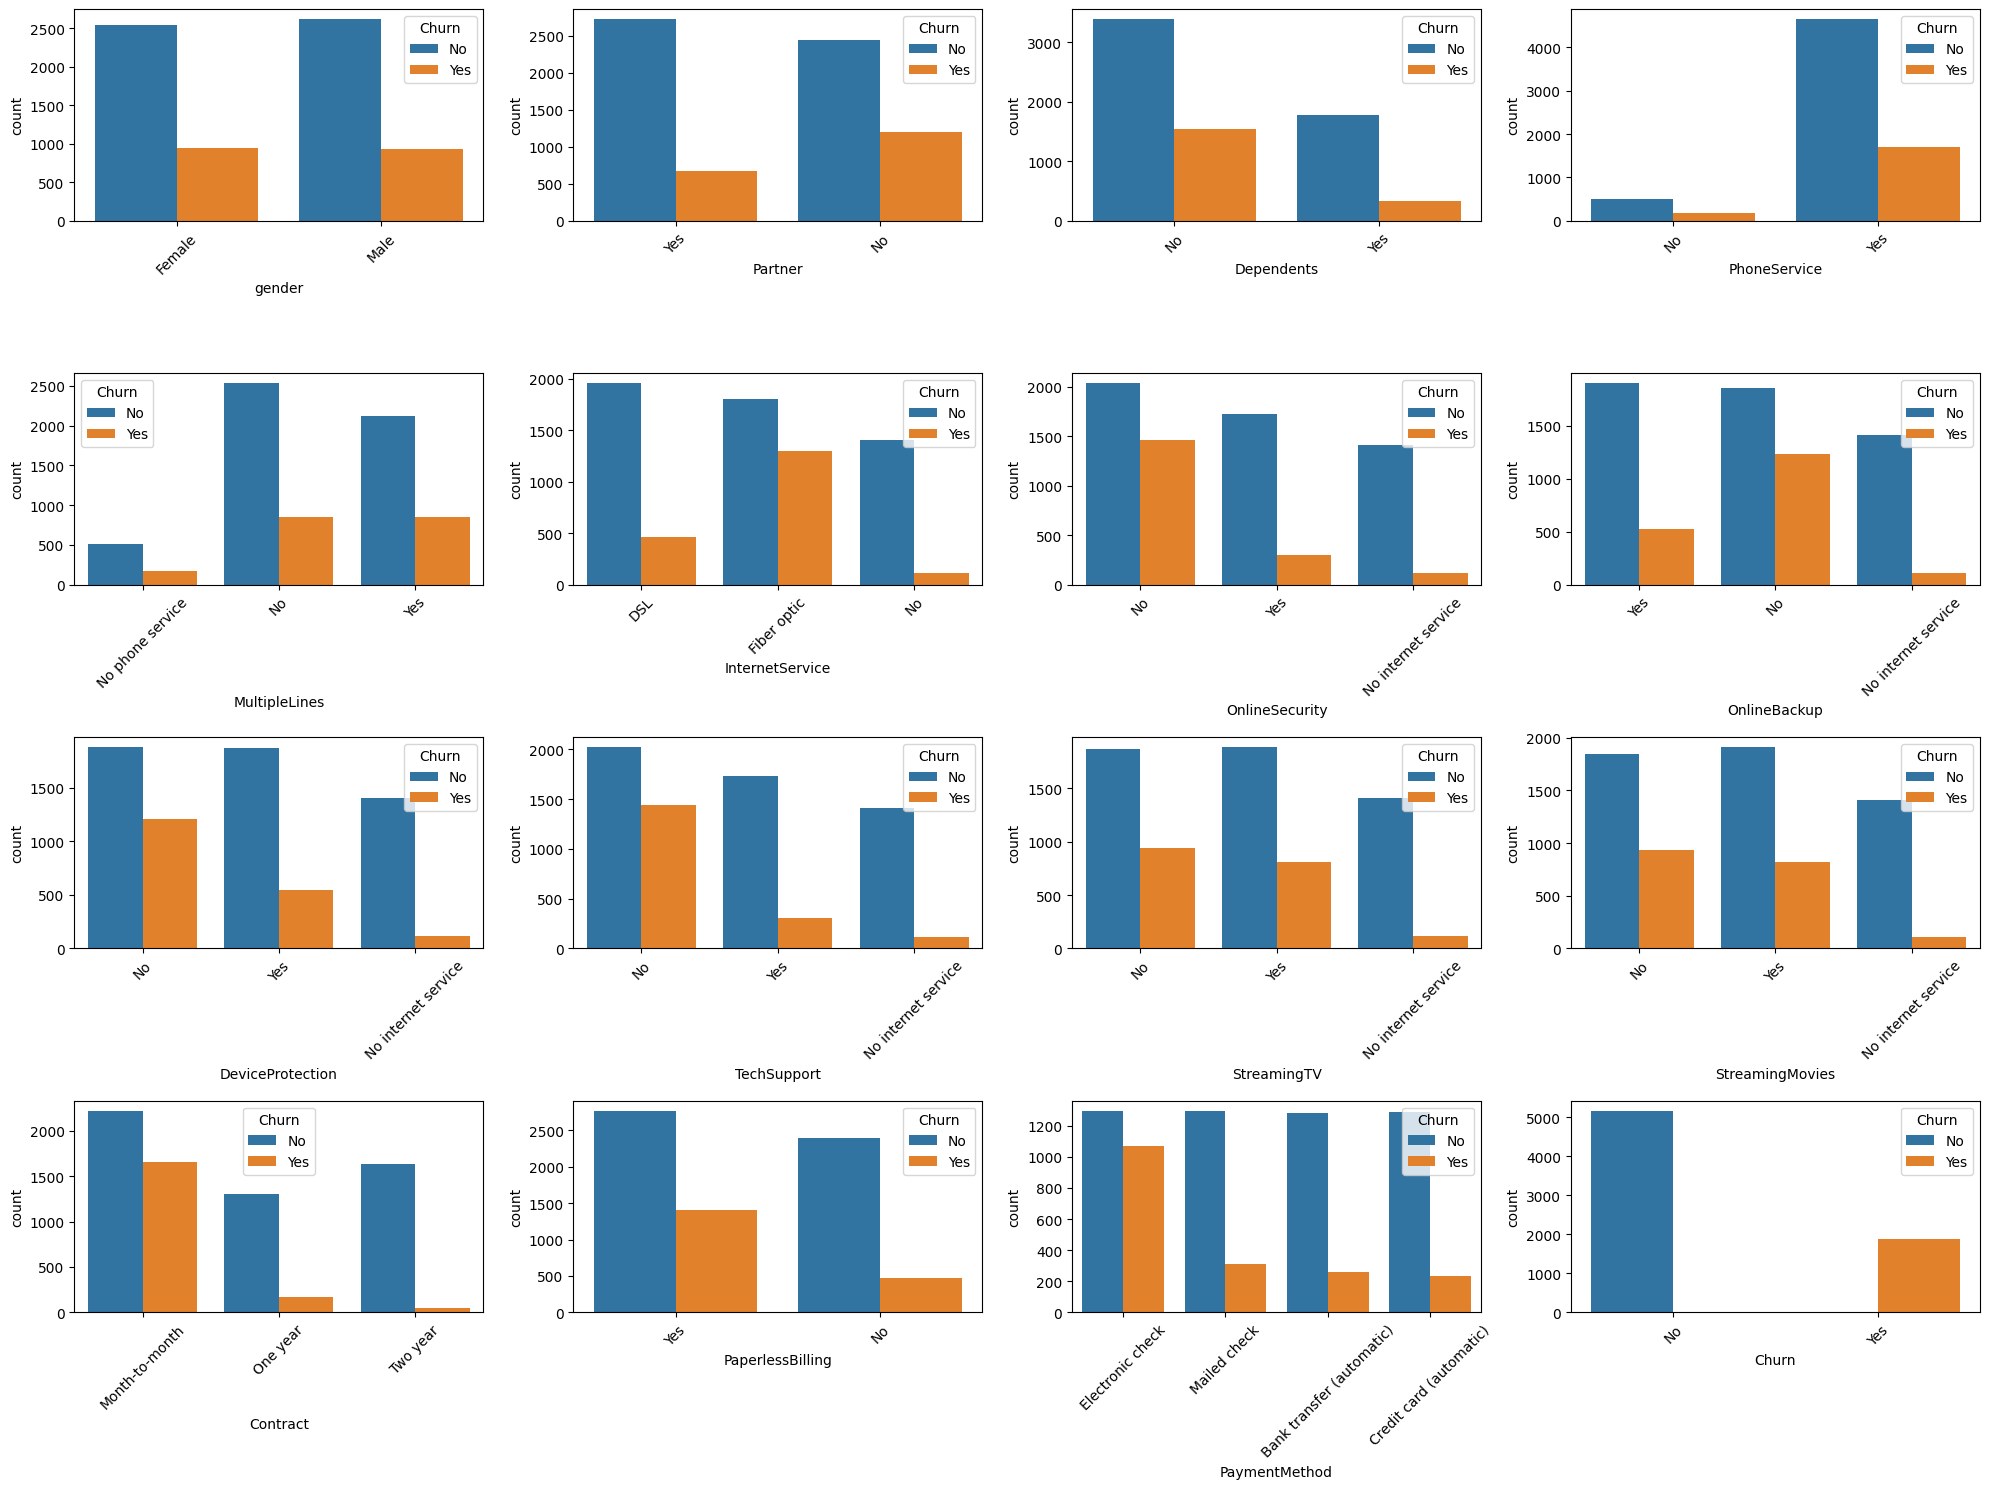

In [30]:
categorical_columns = df.select_dtypes(include=['object'])
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns.columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


### Let us explore the distribution of numeric features ###

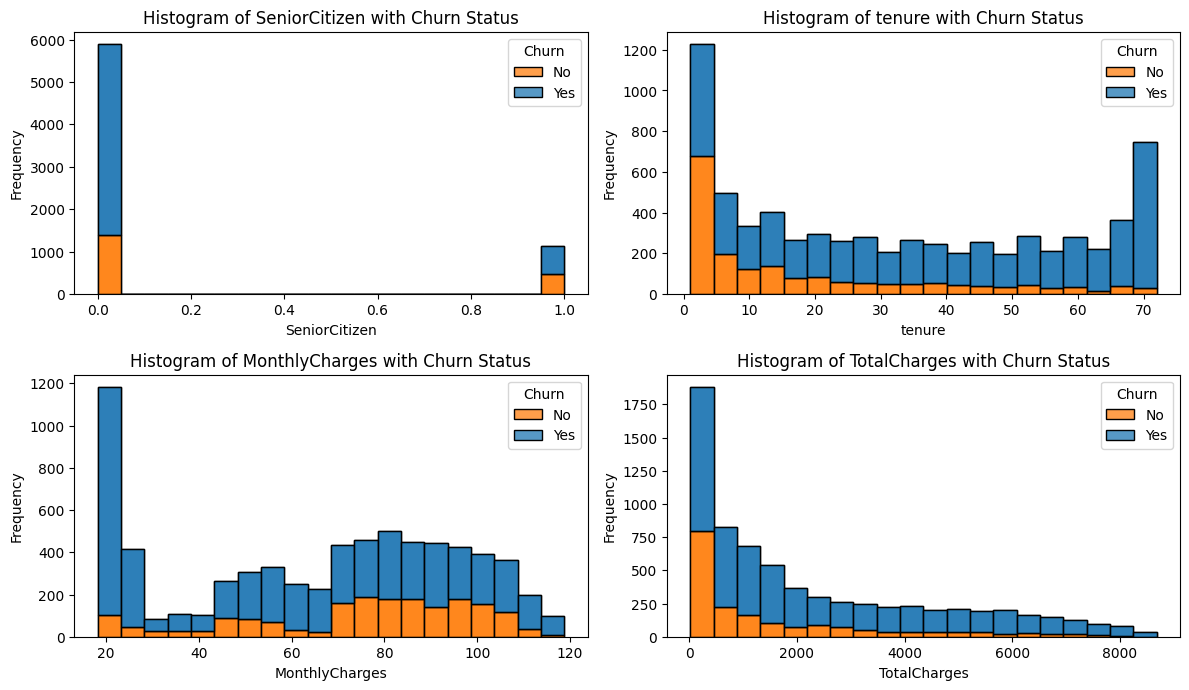

In [31]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
churn_labels = ['No', 'Yes']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(3, 2, i)  # Adjust rows and columns as needed
    for churn_label in churn_labels:
        sns.histplot(data=df, x=col, hue='Churn', hue_order=churn_labels, multiple='stack', bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} with Churn Status')
    plt.legend(title='Churn', loc='upper right', labels=churn_labels)
    plt.tight_layout()

plt.show()

### Let us visualize the correlation between numeric variables using a heatmap.

In [32]:
#assigning telecom df values since dont want to corrupt original data
telecom = df.copy() 

In [33]:
# Converting Yes to 1 and No to 0

telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

In [34]:
X = telecom.drop(['Churn'],axis=1)
y = telecom['Churn']
telecom =telecom.drop(['Churn'],axis=1)

In [35]:
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65


<AxesSubplot:>

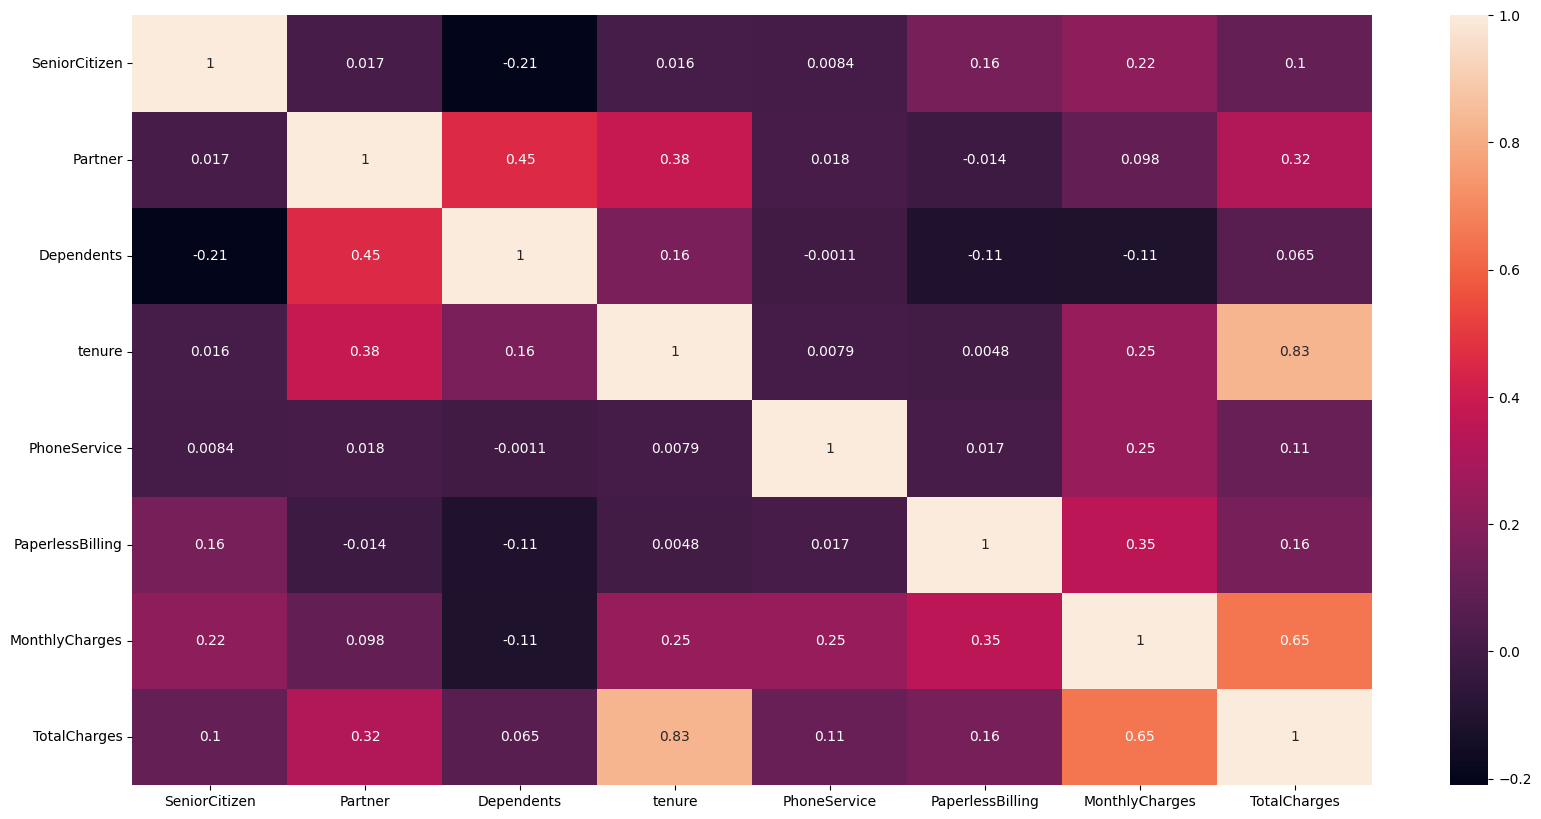

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot = True)

### Let us calculate Spearman's correlation coefficient and p-value ###
**P-value**
- p >0.05 : reject null hypothesis, the parameters are not correlated
- p <0.05 : reject null hypothesis, the parameters are not correlated

**Spearman's Rank Coefficient**
- R =  1  :  Strong positive relation
- R =  0  :  Not correlated
- R = -1  : Strong negative relation


In [37]:
corr, pval = spearmanr(telecom['tenure'], telecom['TotalCharges'])
 
# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

Spearman's correlation coefficient: 0.8891770805365491
p-value: 0.0


**Observation**<br>
Tenure and Total Charge are highly correlated

###  Let us do EDA on the dataset

##### 1. Let us plot **boxplot** for few attributes

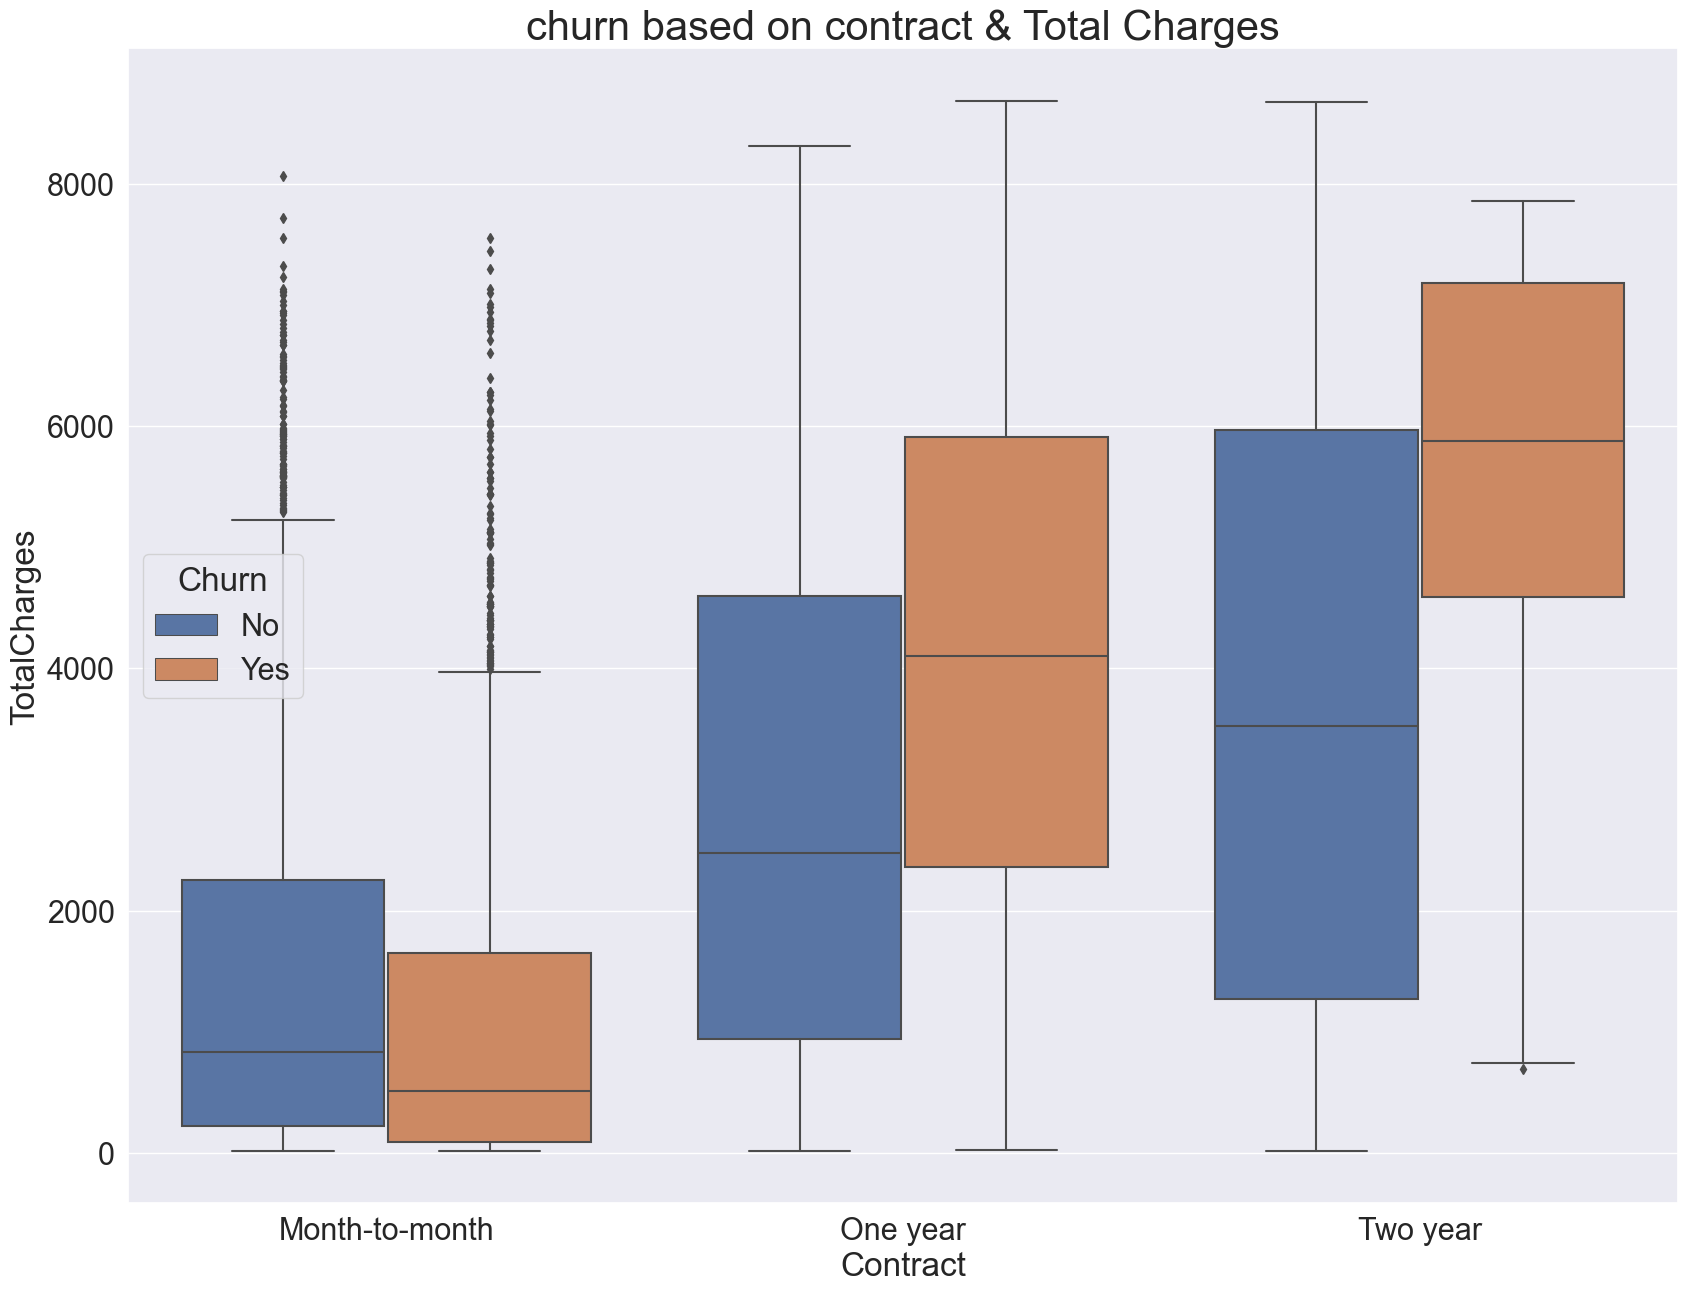

In [40]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=2)
sns.boxplot(data=df,x="Contract",y="TotalCharges",hue="Churn")
plt.title("churn based on contract & Total Charges",fontsize=30)
plt.show()

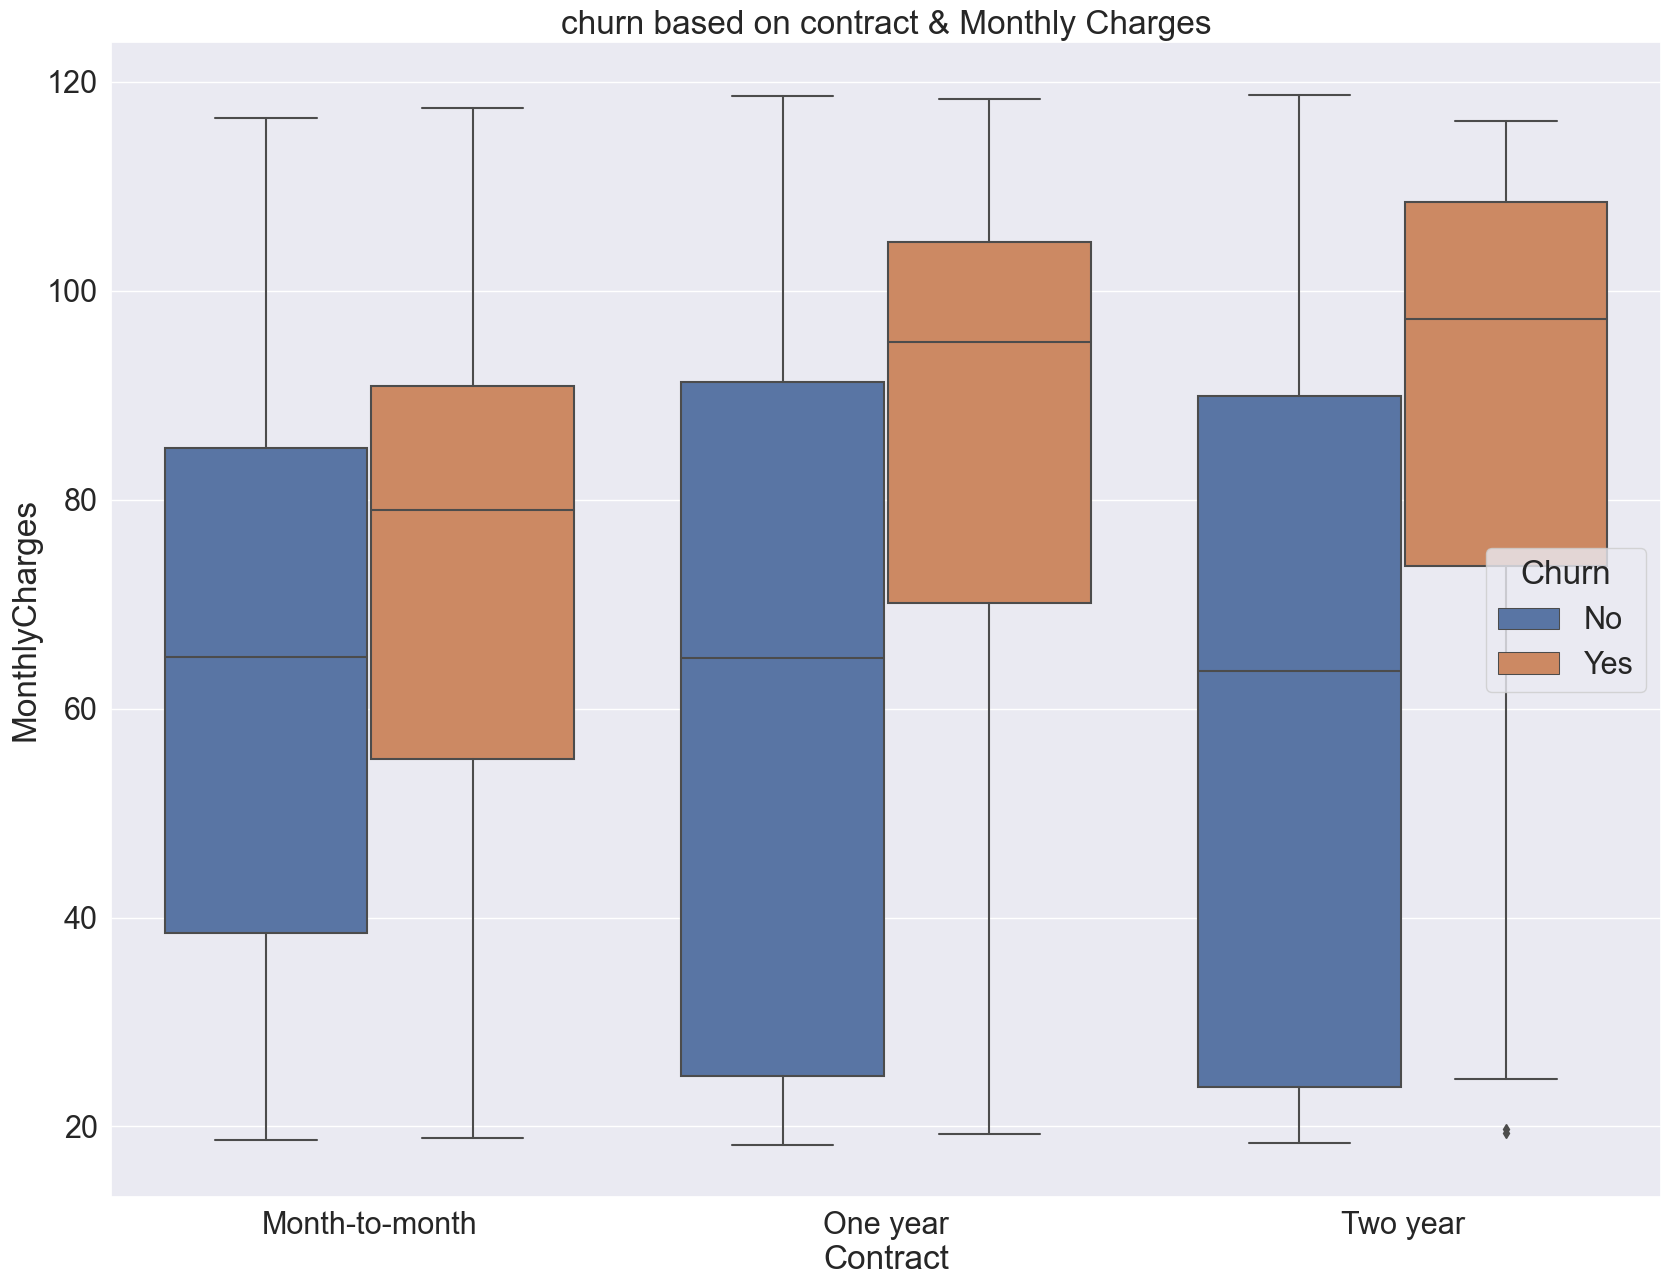

In [41]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(data=df,x="Contract",y="MonthlyCharges",hue="Churn")
plt.title("churn based on contract & Monthly Charges")
plt.show()

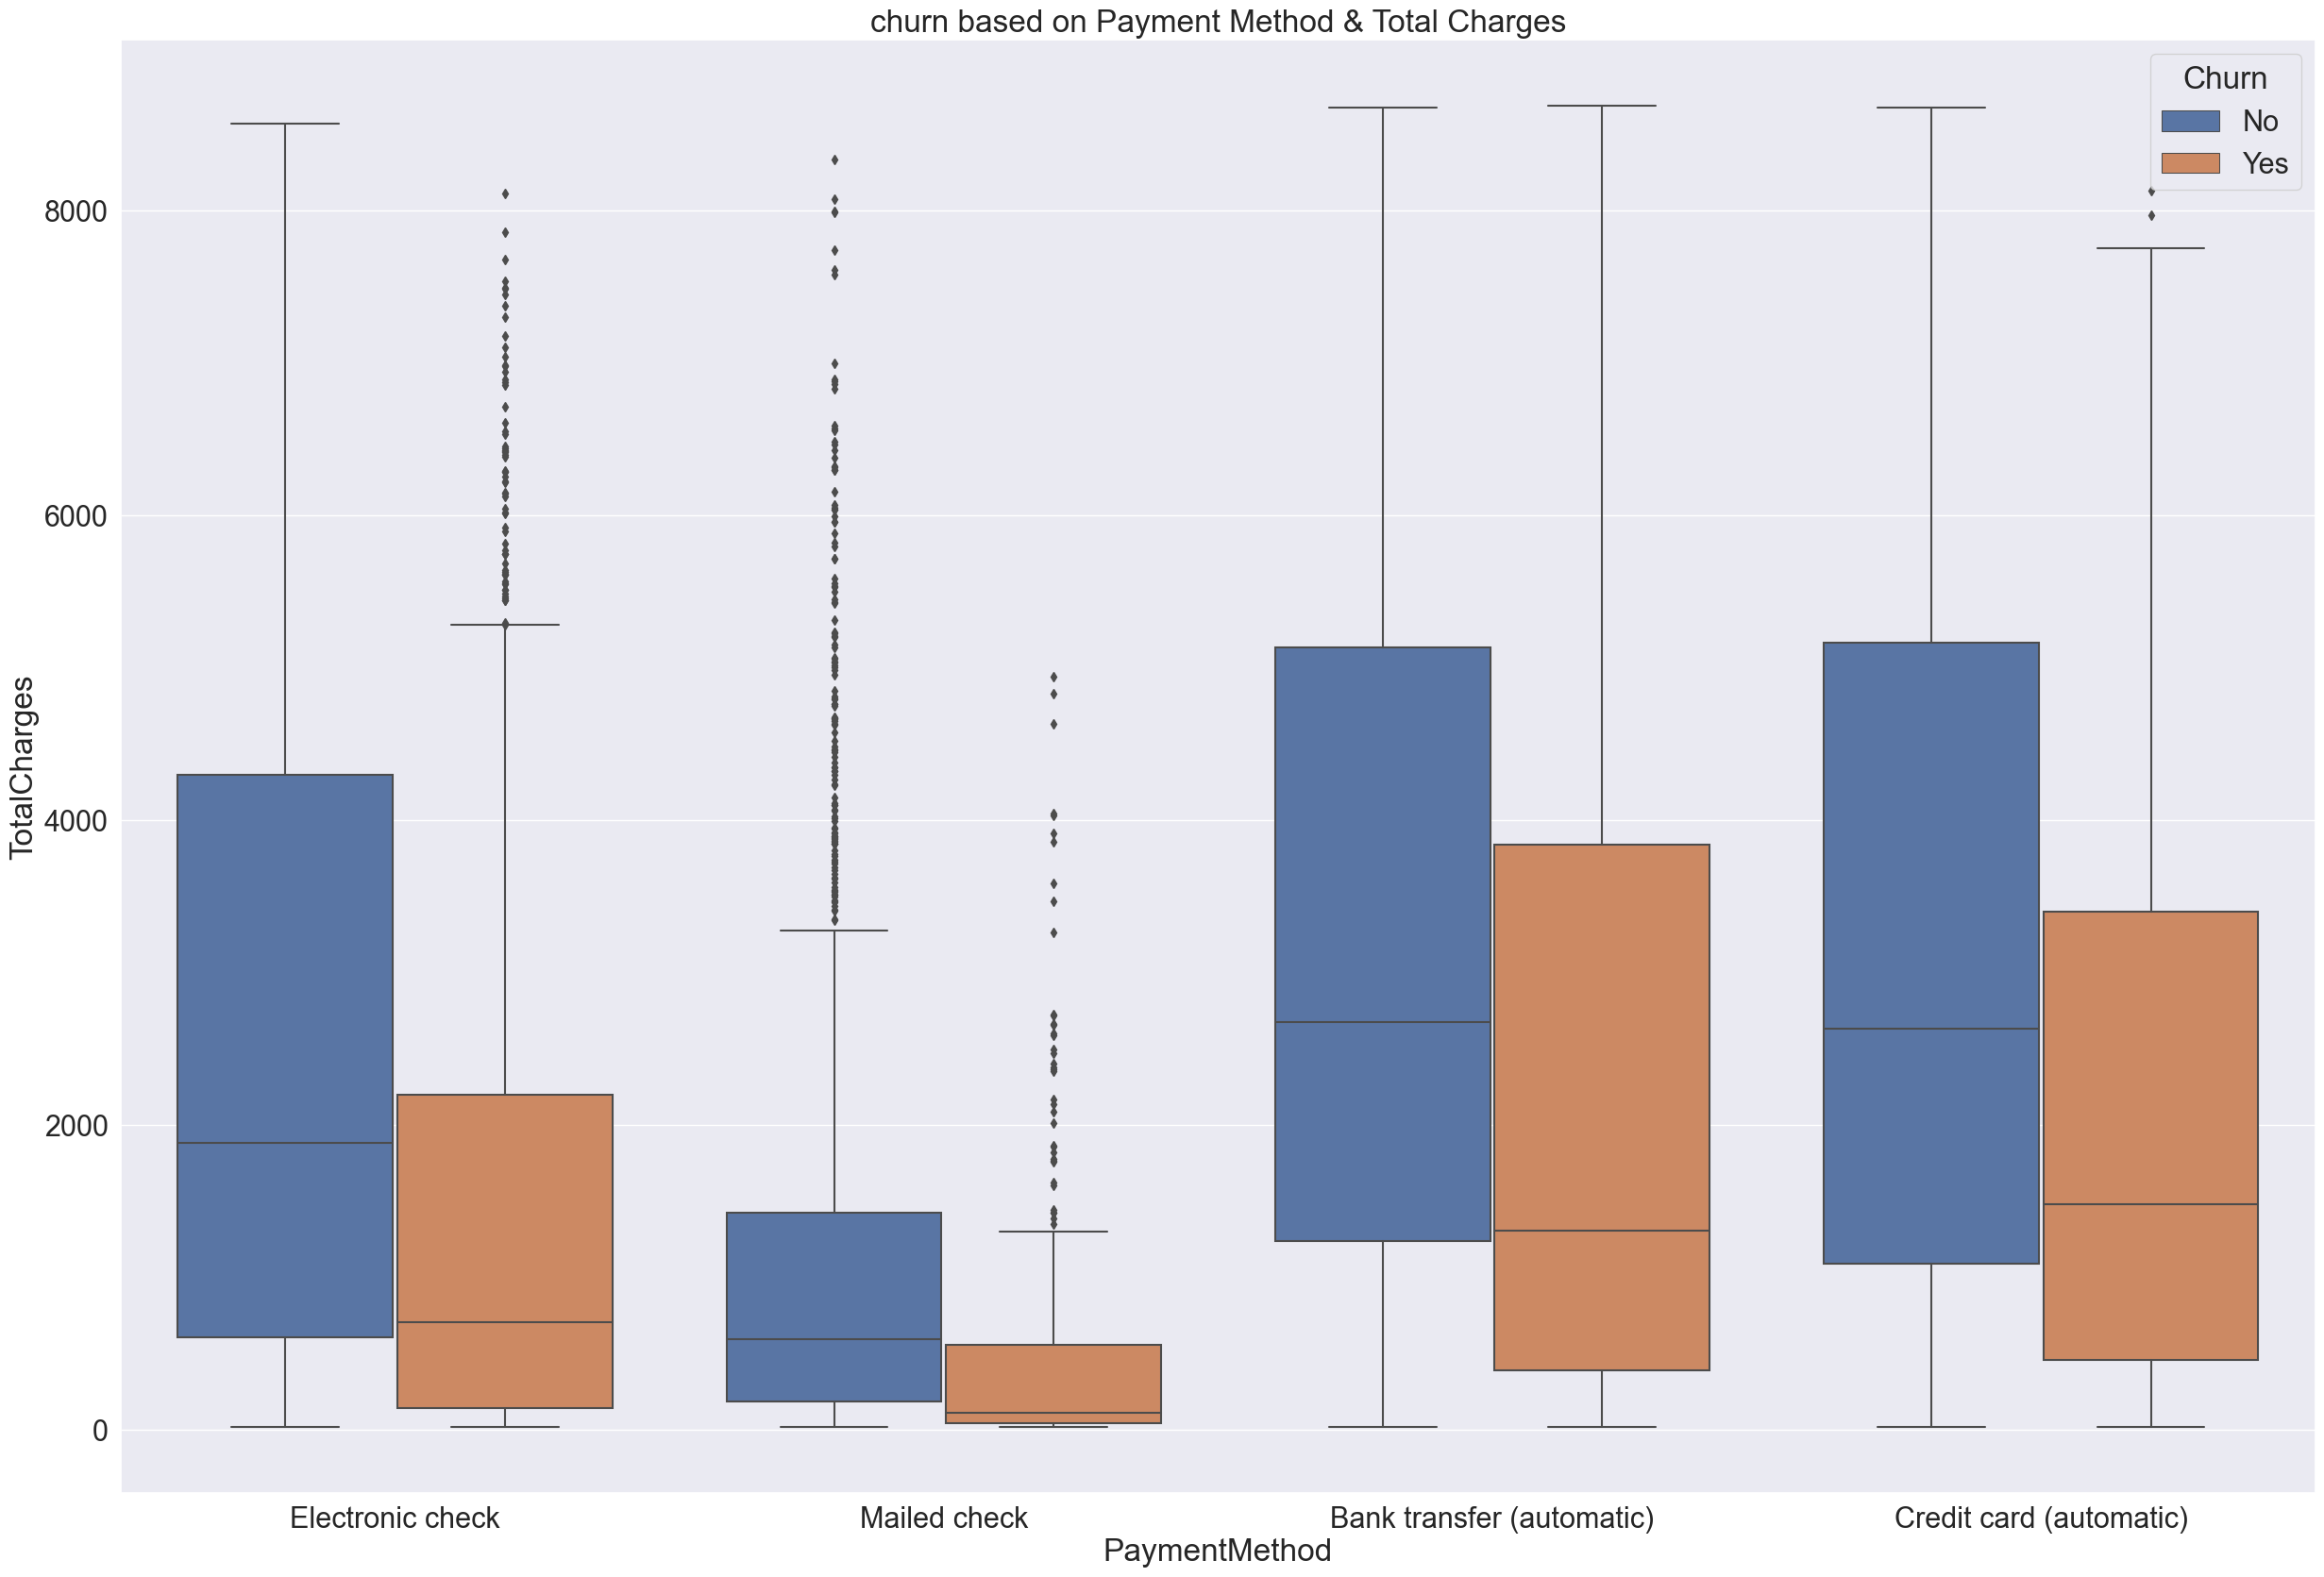

In [42]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(data=df,x="PaymentMethod",y="TotalCharges",hue="Churn")
plt.title("churn based on Payment Method & Total Charges")
plt.show()

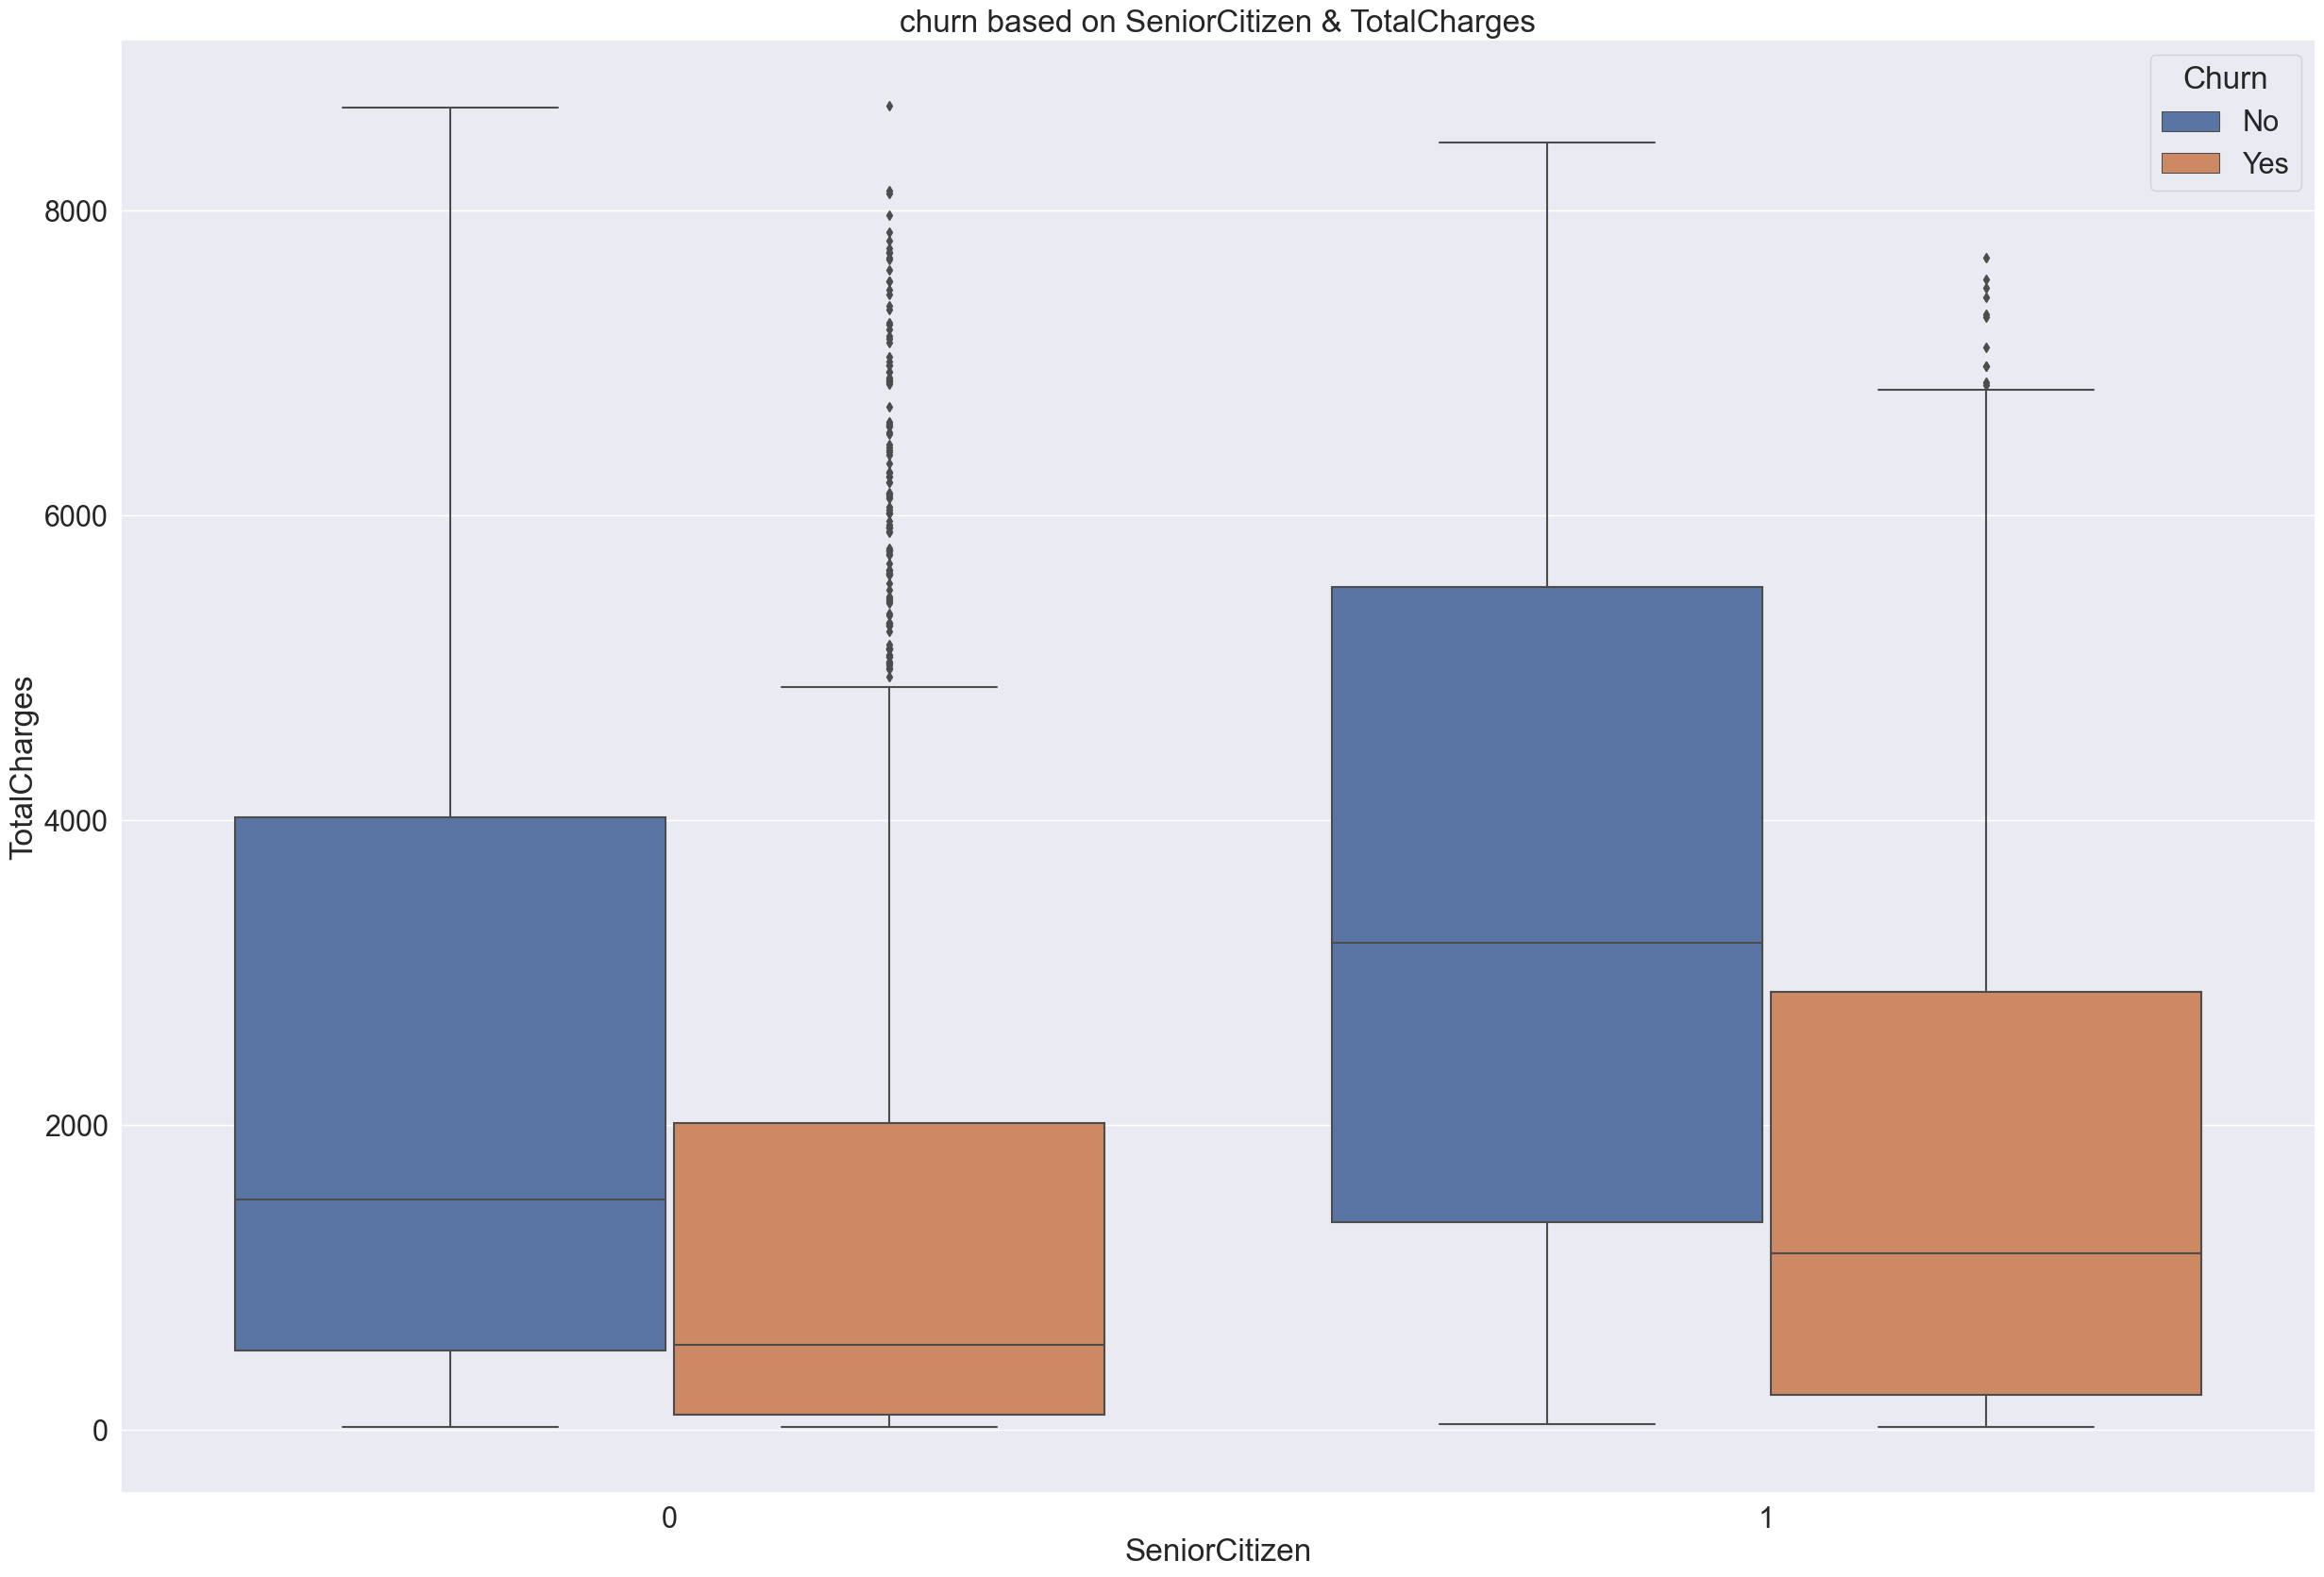

In [43]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(data=df,x="SeniorCitizen",y="TotalCharges",hue="Churn")
plt.title("churn based on SeniorCitizen & TotalCharges")
plt.show()

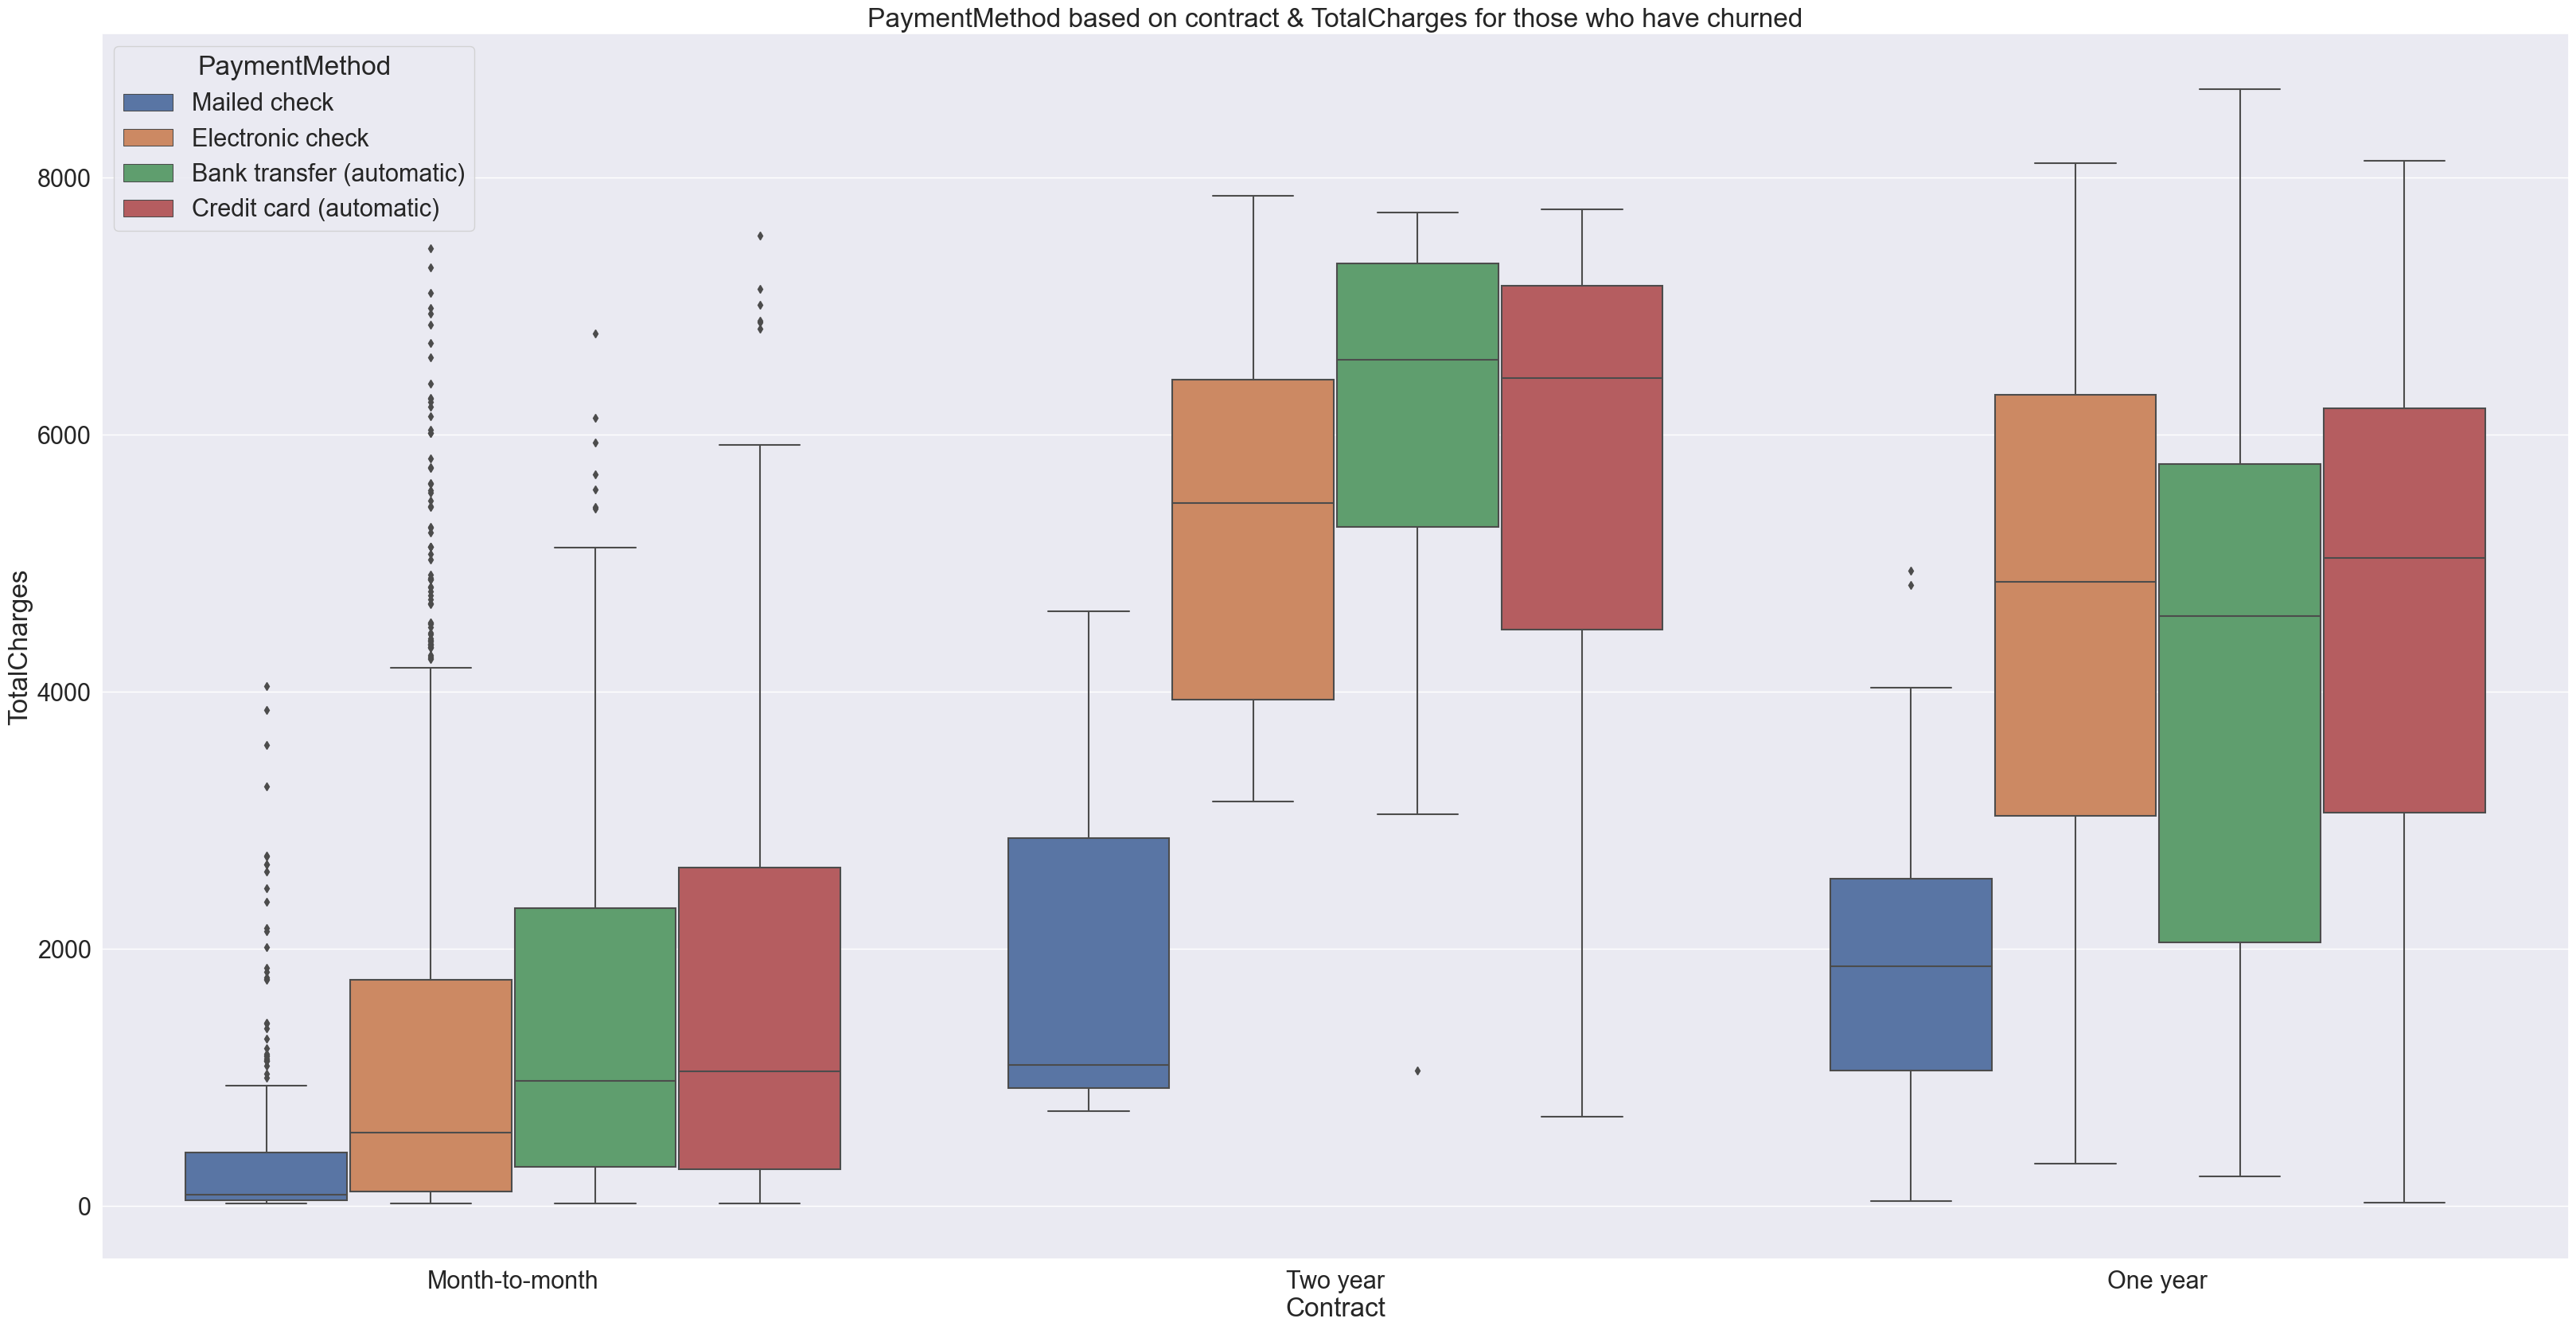

In [66]:
df_churn = df[df['Churn']=='Yes']
fig, ax = plt.subplots(figsize=(40, 20))
sns.boxplot(data=df_churn,x="Contract",y="TotalCharges",hue="PaymentMethod")
plt.title("PaymentMethod based on contract & TotalCharges for those who have churned")
plt.show()

##### 2. Let us visualise **Q-Q plot** for few attributes

<Figure size 3000x2000 with 0 Axes>

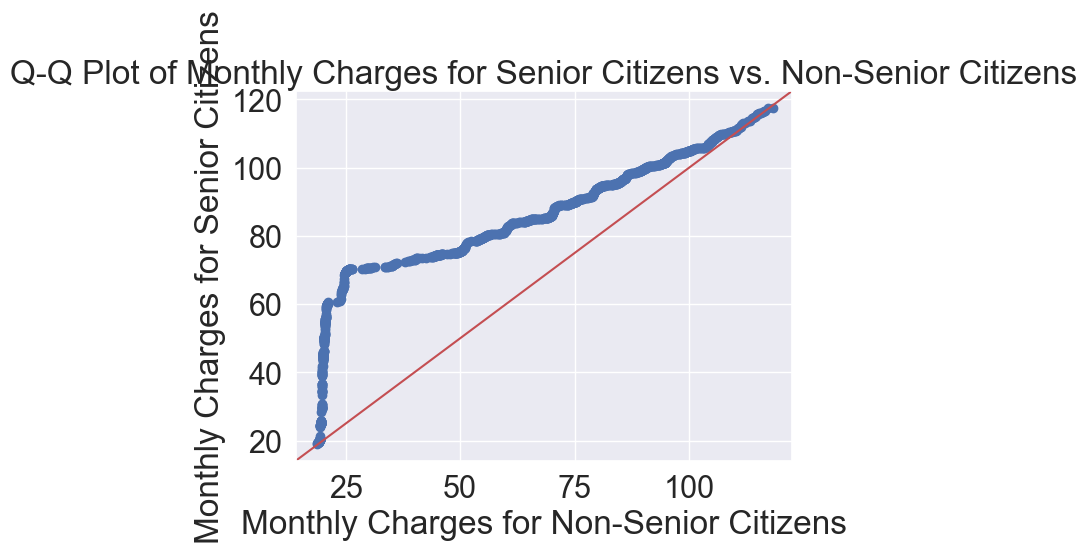

In [71]:
# Define SC and non-SC subsets
sc_customers = telecom[telecom['SeniorCitizen'] == 1]
non_sc_customers = telecom[telecom['SeniorCitizen'] == 0]
plt.figure(figsize=(30, 20))
# Q-Q plot for senior citizens' monthly charges vs. non-senior citizens' monthly charges
sm.qqplot_2samples(np.sort(sc_customers['MonthlyCharges']), np.sort(non_sc_customers['MonthlyCharges']),
                   line='45', xlabel='Monthly Charges for Senior Citizens', ylabel='Monthly Charges for Non-Senior Citizens')
plt.title('Q-Q Plot of Monthly Charges for Senior Citizens vs. Non-Senior Citizens')
plt.show()


<Figure size 3000x2000 with 0 Axes>

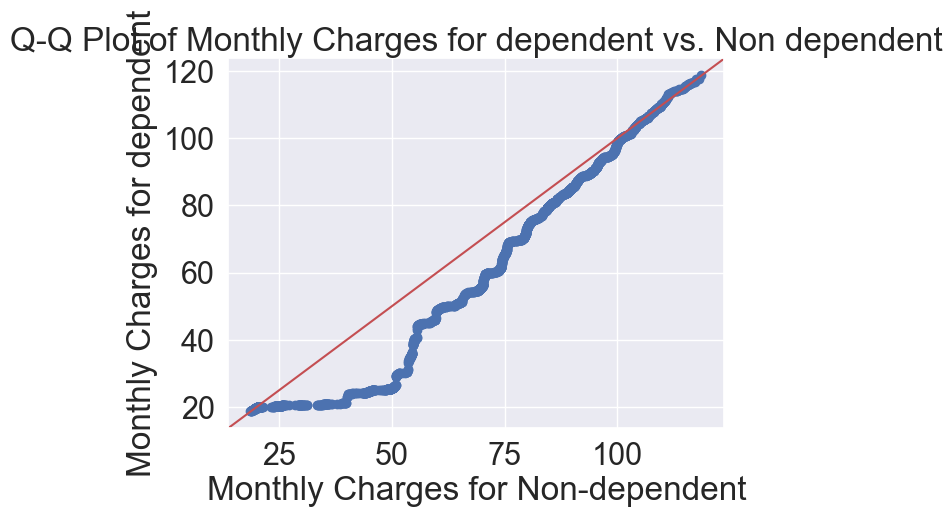

In [73]:
# Define dependent and non-dependent subsets
dependent_customers = telecom[telecom['Dependents'] == 1]
non_dependent_customers = telecom[telecom['Dependents'] == 0]
plt.figure(figsize=(30, 20))
# Q-Q plot for dependent monthly charges vs. non-dependent monthly charges
sm.qqplot_2samples(np.sort(dependent_customers['MonthlyCharges']), np.sort(non_dependent_customers['MonthlyCharges']),
                   line='45', xlabel='Monthly Charges for dependent', ylabel='Monthly Charges for Non-dependent')
plt.title('Q-Q Plot of Monthly Charges for dependent vs. Non dependent')
plt.show()


<Figure size 1000x600 with 0 Axes>

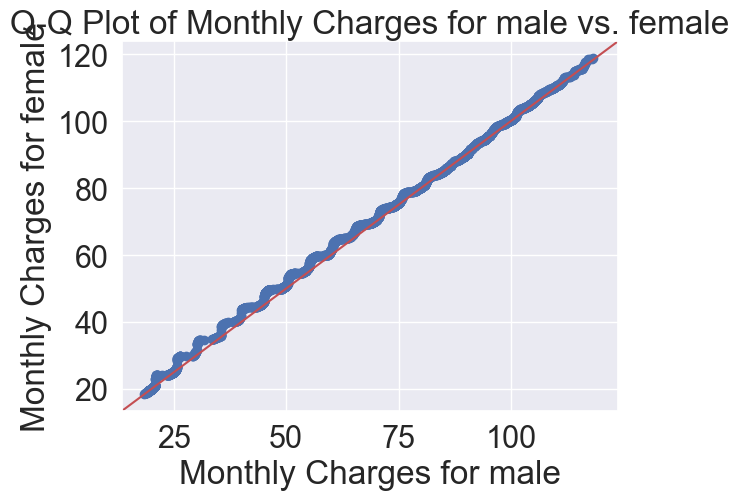

In [82]:
# Define male and female subsets
male_customers = telecom[telecom['gender'] == 'Male']
female_customers = telecom[telecom['gender'] == 'Female']
plt.figure(figsize=(10, 6))
# Q-Q plot for dependent monthly charges vs. non-dependent monthly charges
sm.qqplot_2samples(np.sort(male_customers['MonthlyCharges']), np.sort(female_customers['MonthlyCharges']),
                   line='45', xlabel='Monthly Charges for male', ylabel='Monthly Charges for female')
plt.title('Q-Q Plot of Monthly Charges for male vs. female')
plt.show()


##### 3. Let us plot **scatter plot**

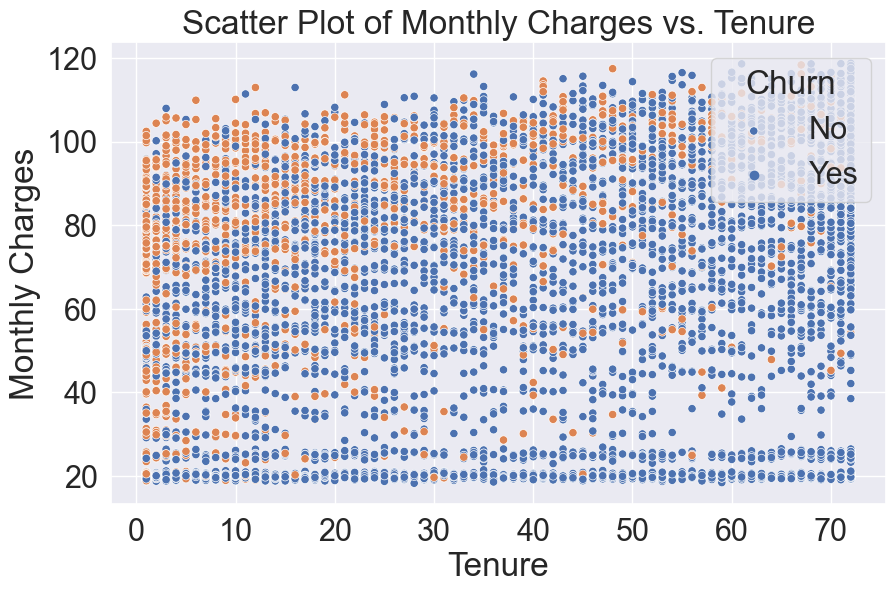

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=telecom, x='tenure', y='MonthlyCharges', hue=df['Churn'])
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Scatter Plot of Monthly Charges vs. Tenure')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


#### Observation
There is no correlation between the two features

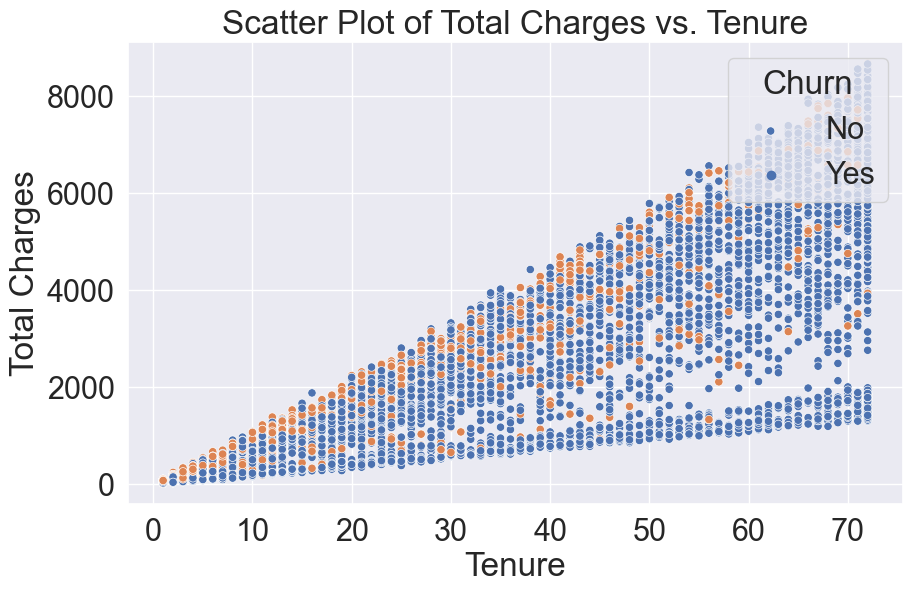

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=telecom, x='tenure', y='TotalCharges', hue=df['Churn'])
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Scatter Plot of Total Charges vs. Tenure')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


#### Observation
There is positive correlation between the two features

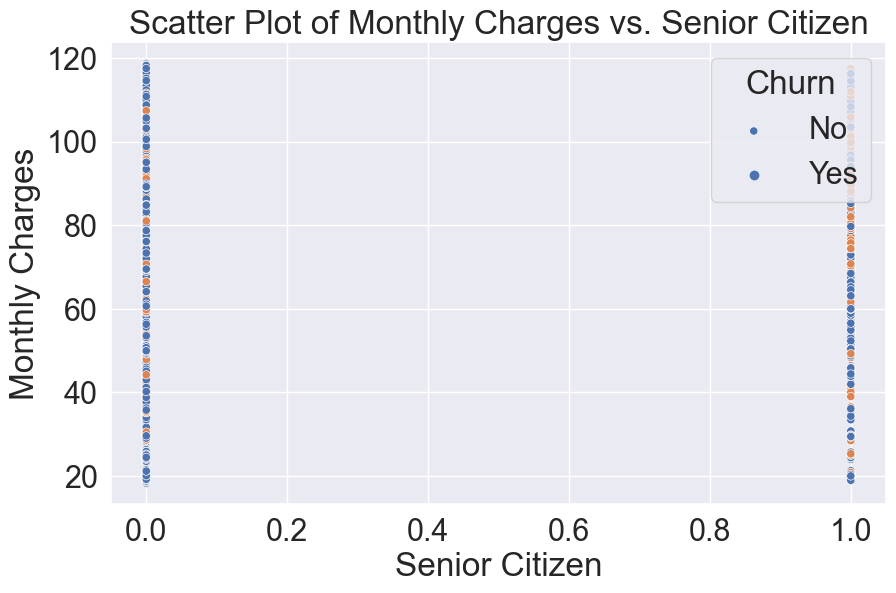

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=telecom, x='SeniorCitizen', y='MonthlyCharges', hue=df['Churn'])
plt.xlabel('Senior Citizen')
plt.ylabel('Monthly Charges')
plt.title('Scatter Plot of Monthly Charges vs. Senior Citizen')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()
